<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [3]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

    Updating registry at `C:\Users\micke\.julia\registries\General.toml`


   Resolving package versions...


  No Changes to `C:\Users\micke\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\micke\.julia\environments\v1.8\Manifest.toml`


In [2]:
import SpecialFunctions
import Plots

In [1]:
using SpecialFunctions
using Plots

In [9]:
function sample_gaussian(mu,sigma,n)
    g = zeros(n)
    for x in 1:n
        num = rand()
        g[x] = mu .+ (sigma .* sqrt(2) .* (erfinv((2 .* num) .- 1)))
    end
    g
end

sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

In [10]:
data = sample_gaussian(-1,2,10000)

10000-element Vector{Float64}:
 -2.746960373925365
 -2.8110706810385433
 -0.3817548382886281
 -4.136886276484322
 -3.4435293272746885
 -0.01256851967004724
  0.6658062172564729
 -2.6968876404742224
 -3.6601119934287234
 -1.822438205244196
  ⋮
 -5.240643281597185
 -1.1582326211958072
 -2.583380477536851
 -0.20830376036135778
  4.811327196331872
 -1.1299317704313478
 -3.0176602506377255
  1.4785090488624624
 -1.2123808209791063

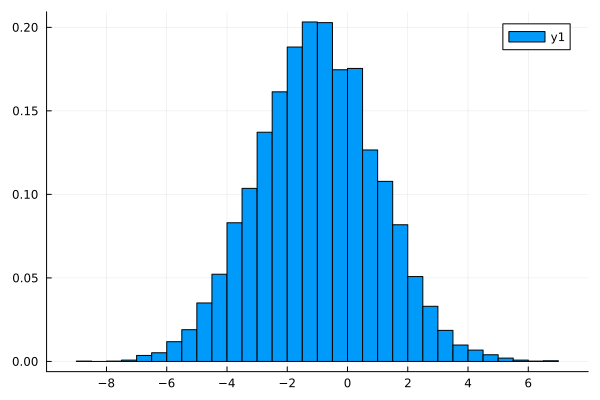

In [11]:
histogram(data, normalize=true)

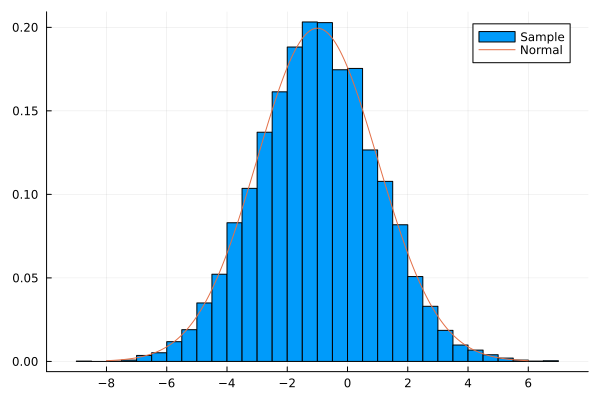

In [14]:
using Distributions
x=-8:0.001:6
gauss =  pdf.(Normal(-1,2),x)
histogram(data,normalize=true, label="Sample")
plot!(x,gauss, label = "Normal")